In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import outils_data

In [64]:
df = pd.read_csv('Loan Data.csv')
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
50,LP001155,Female,Yes,0,Not Graduate,No,1928,1644.0,100.0,360.0,1.0,Semiurban,Y
423,LP002362,Male,Yes,1,Graduate,No,7250,1667.0,110.0,NaN,0.0,Urban,N
594,LP002938,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y
539,LP002740,Male,Yes,3+,Graduate,No,6417,0.0,157.0,180.0,1.0,Rural,Y
243,LP001807,Male,Yes,2,Graduate,Yes,6250,1300.0,108.0,360.0,1.0,Rural,Y


---
**Identification des variables catégorielles et numériques**

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [66]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
numeric_columns.remove('Credit_History')
numeric_columns

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [67]:
categorical_columns = df.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
categorical_columns.append('Credit_History')
categorical_columns.remove('Loan_ID')
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

---
Description du dataframe, identification des valeurs nulles

In [68]:
df.shape

(614, 13)

In [69]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [70]:
df.describe(exclude=np.number)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [71]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

---
Analyses univariées

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


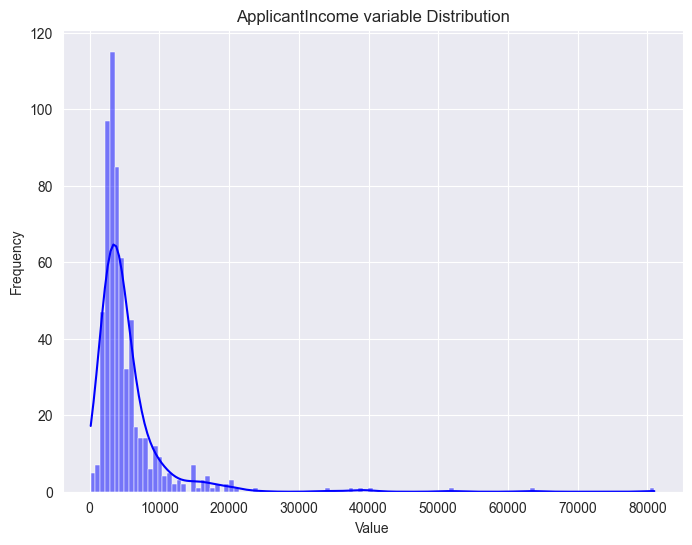

La variable ApplicantIncome ne suit pas une distribution normale.
count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


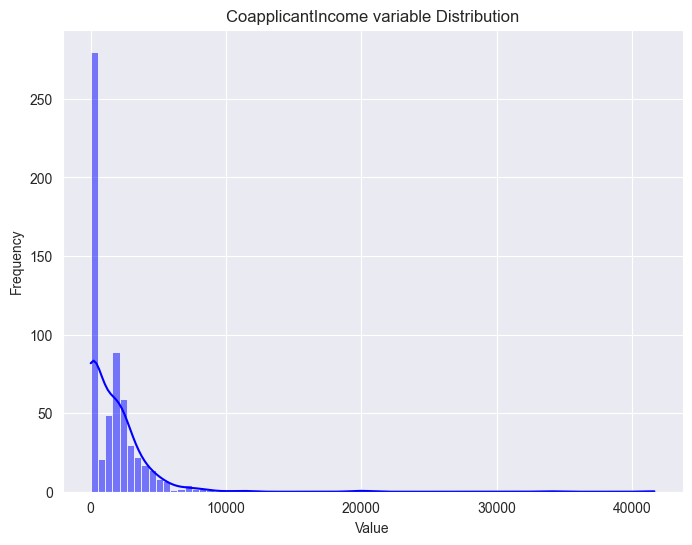

La variable CoapplicantIncome ne suit pas une distribution normale.
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


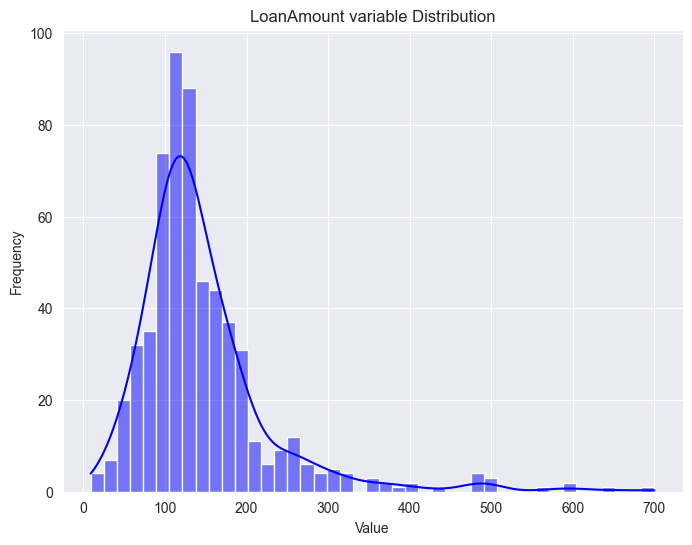

La variable LoanAmount suit une distribution normale.
count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


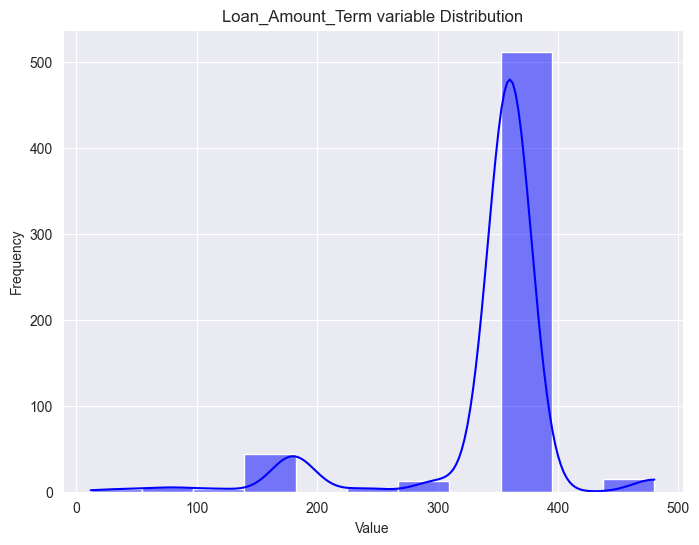

La variable Loan_Amount_Term suit une distribution normale.


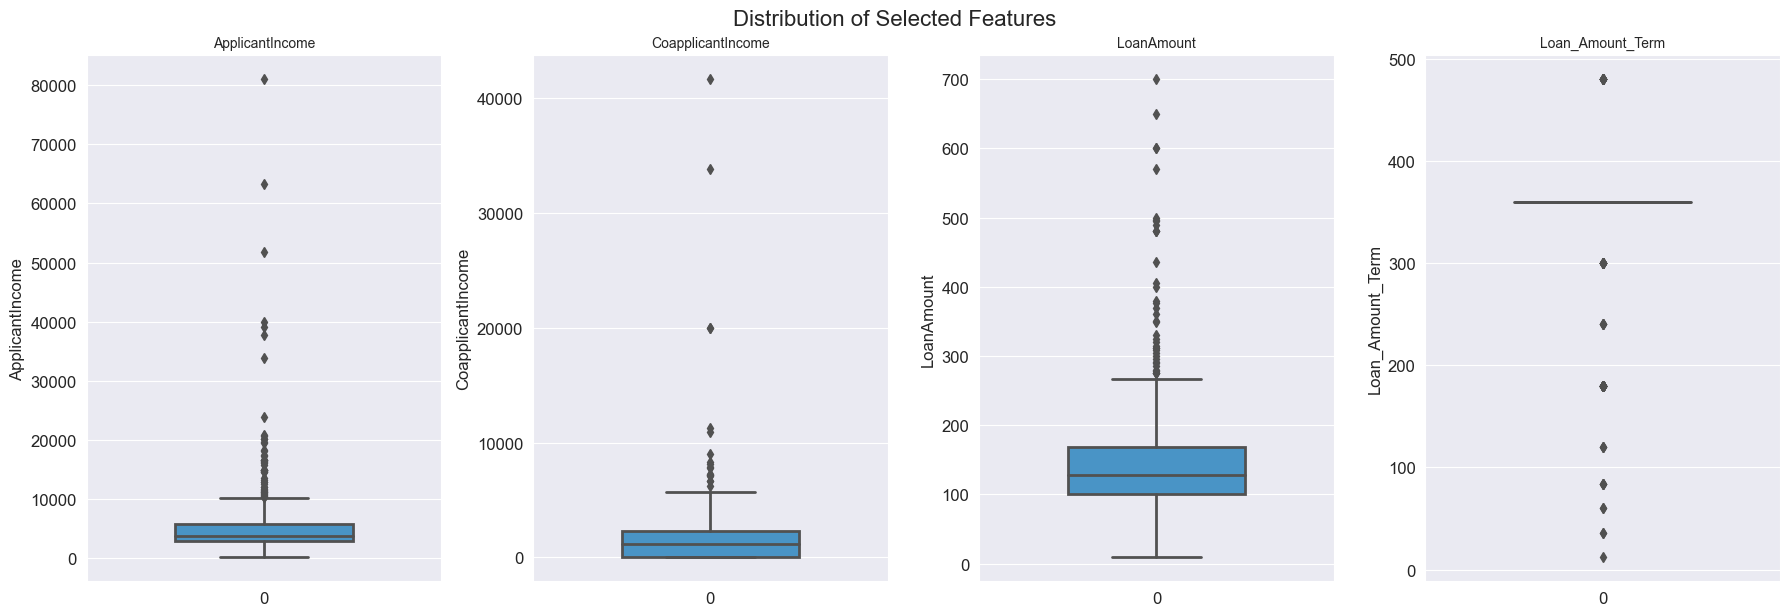

In [72]:
for column in numeric_columns:
    outils_data.distribution_curve(df, column)
    
    if (outils_data.normal_distribution(df, column, 0.05)) :
        print(f"La variable {column} suit une distribution normale.")
    else:
        print(f"La variable {column} ne suit pas une distribution normale.")

outils_data.draw_boxplots(numeric_columns, df)

In [73]:
for column in categorical_columns :
    print(f"{column} : {df[column].unique()}")

Gender : ['Male' 'Female' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '1' '2' '3+' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
Property_Area : ['Urban' 'Rural' 'Semiurban']
Loan_Status : ['Y' 'N']
Credit_History : [ 1.  0. nan]


In [74]:
df_inconnu = df.copy()
for column in categorical_columns :
    df_inconnu[column] = df_inconnu[column].fillna("Inconnu")
    
# Calculer les pourcentages d'occurrence
for column in categorical_columns :
    print("\n")
    pourcentages = df_inconnu[column].value_counts(normalize=True) * 100
    pourcentages = pourcentages.round(2)
    print(pourcentages)



Gender
Male       79.64
Female     18.24
Inconnu     2.12
Name: proportion, dtype: float64


Married
Yes        64.82
No         34.69
Inconnu     0.49
Name: proportion, dtype: float64


Dependents
0          56.19
1          16.61
2          16.45
3+          8.31
Inconnu     2.44
Name: proportion, dtype: float64


Education
Graduate        78.18
Not Graduate    21.82
Name: proportion, dtype: float64


Self_Employed
No         81.43
Yes        13.36
Inconnu     5.21
Name: proportion, dtype: float64


Property_Area
Semiurban    37.95
Urban        32.90
Rural        29.15
Name: proportion, dtype: float64


Loan_Status
Y    68.73
N    31.27
Name: proportion, dtype: float64


Credit_History
1.0        77.36
0.0        14.50
Inconnu     8.14
Name: proportion, dtype: float64


In [75]:
# Remplacement des valeurs NaN par le mode
df_na_filled = df.copy()
for column in categorical_columns :
    column_mode = df[column].mode()[0]
    df_na_filled[column] = df_na_filled[column].fillna(column_mode)

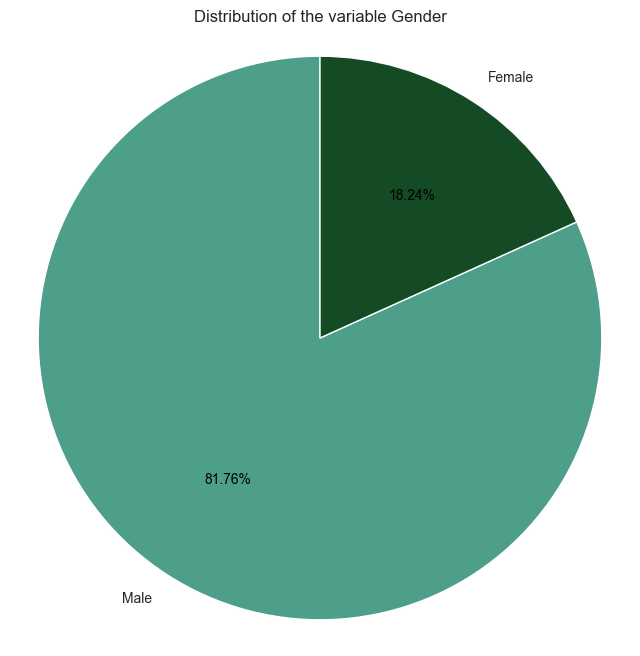

In [76]:
outils_data.draw_pieplot(df_na_filled,'Gender')

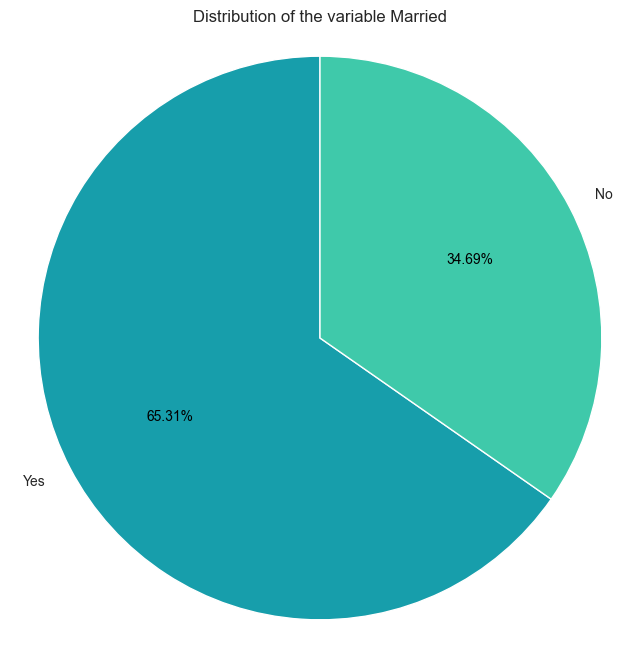

In [77]:
outils_data.draw_pieplot(df_na_filled,'Married')

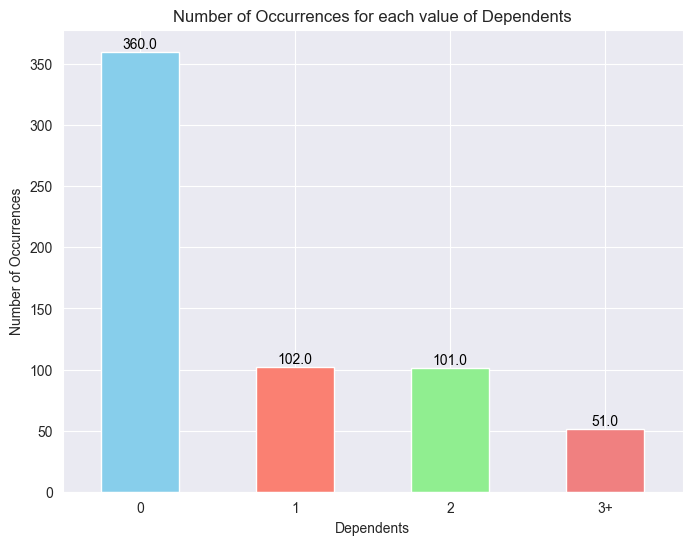

In [78]:
outils_data.draw_barplot(df_na_filled,'Dependents')

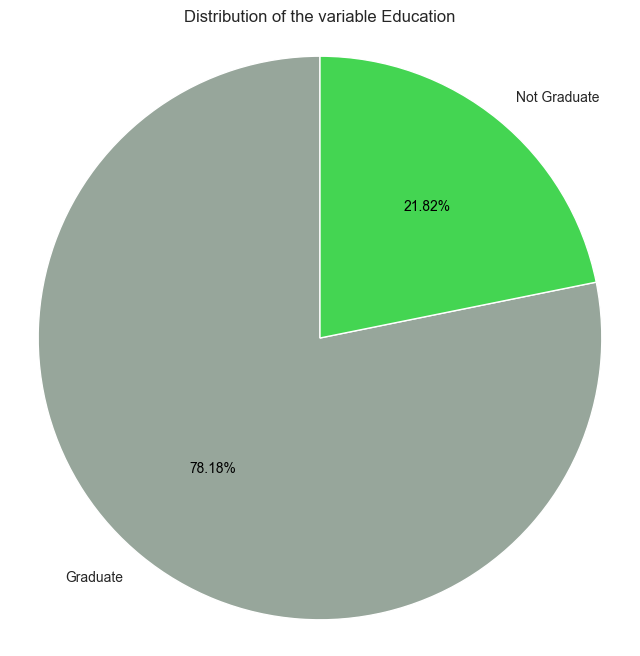

In [79]:
outils_data.draw_pieplot(df_na_filled,'Education')

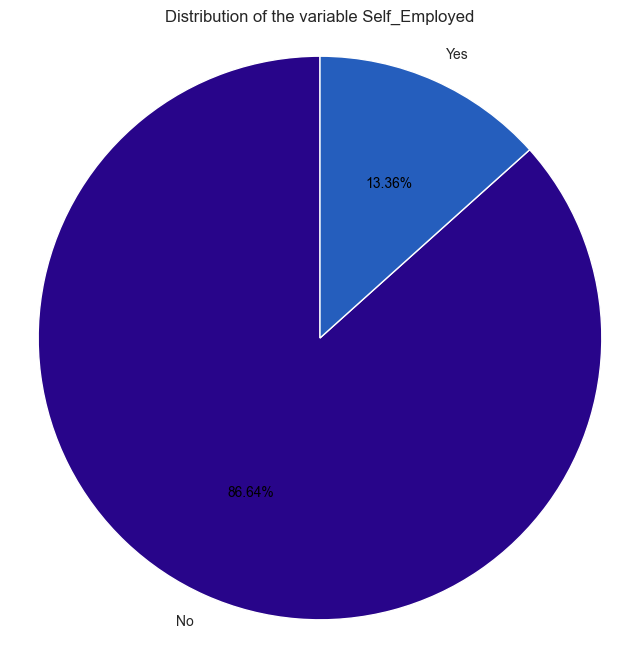

In [80]:
outils_data.draw_pieplot(df_na_filled,'Self_Employed')

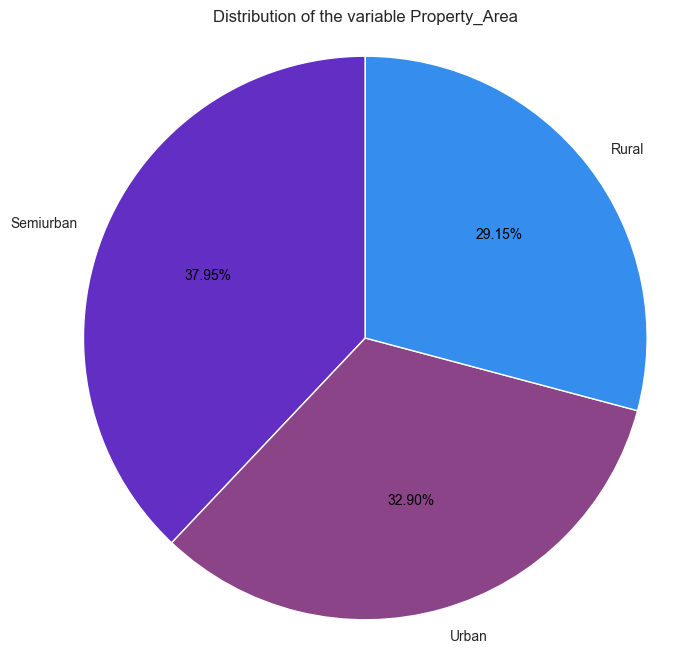

In [81]:
outils_data.draw_pieplot(df_na_filled,'Property_Area')

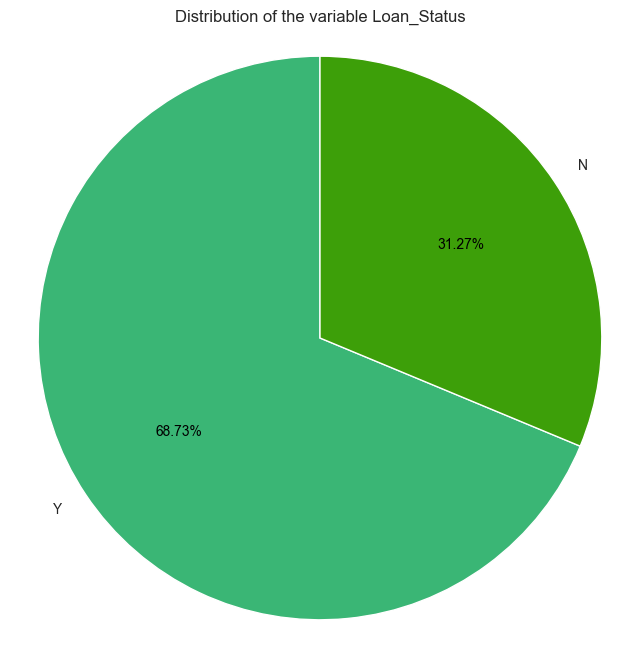

In [82]:
outils_data.draw_pieplot(df_na_filled,'Loan_Status')

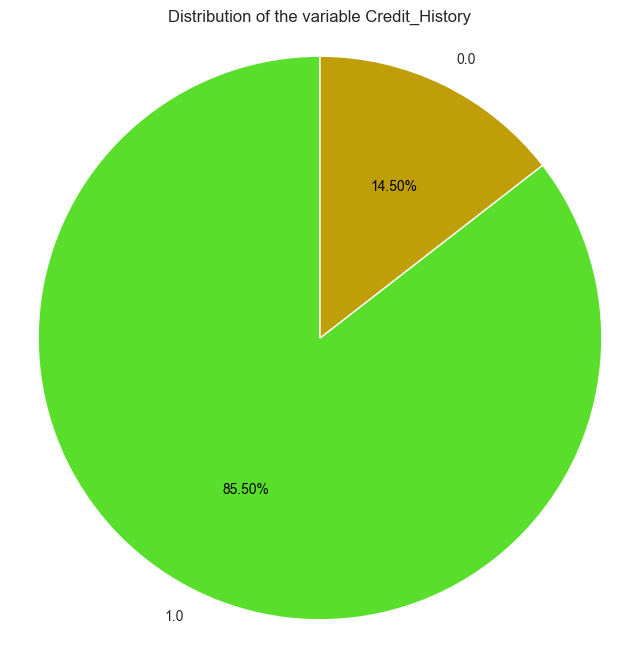

In [83]:
outils_data.draw_pieplot(df_na_filled,'Credit_History')

---
**Analyses bivariées**

In [84]:
df_corr = df[numeric_columns]
correl = df_corr.corr()
correl.style.background_gradient(cmap='coolwarm')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878
LoanAmount,0.570909,0.188619,1.000000,0.039447
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000


<Axes: >

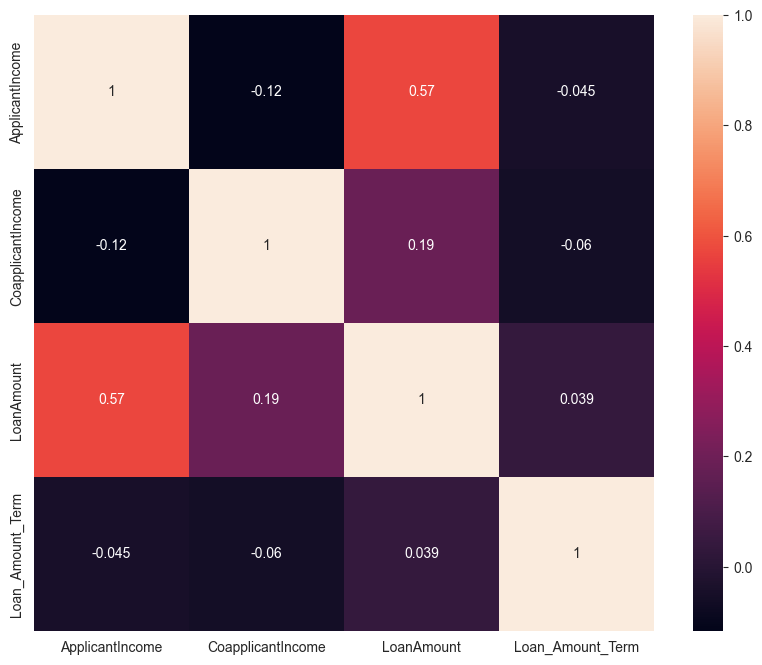

In [85]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), fmt='.2g', annot=True)

In [86]:
outils_data.chi_squared_tests(df_na_filled, categorical_columns)

Test du χ² entre Gender et Married:
Statistique de test du χ² : 79.63562874824729
Valeur de p : 4.502328957824834e-19
Degrés de liberté : 1
Fréquences attendues :
[[ 38.8534202  73.1465798]
 [174.1465798 327.8534202]]


Test du χ² entre Gender et Dependents:
Statistique de test du χ² : 19.49201865207906
Valeur de p : 0.00021627443011424633
Degrés de liberté : 3
Fréquences attendues :
[[ 65.66775244  18.60586319  18.42345277   9.3029316 ]
 [294.33224756  83.39413681  82.57654723  41.6970684 ]]


Test du χ² entre Gender et Education:
Statistique de test du χ² : 0.9951537284364683
Valeur de p : 0.31848601211356387
Degrés de liberté : 1
Fréquences attendues :
[[ 87.55700326  24.44299674]
 [392.44299674 109.55700326]]


Test du χ² entre Gender et Self_Employed:
Statistique de test du χ² : 0.0
Valeur de p : 1.0
Degrés de liberté : 1
Fréquences attendues :
[[ 97.04234528  14.95765472]
 [434.95765472  67.04234528]]


Test du χ² entre Gender et Property_Area:
Statistique de test du χ² : 7.79037

Remplaçons les valeurs nulles par la médiane pour les colonnes LoanAmount et Loan_Amount_Term

In [87]:
med_loan_amount = df_na_filled['LoanAmount'].median()
df_na_filled['LoanAmount'] = df_na_filled['LoanAmount'].fillna(med_loan_amount)

In [88]:
med_loan_amount_term = df_na_filled['Loan_Amount_Term'].median()
df_na_filled['Loan_Amount_Term'] = df_na_filled['Loan_Amount_Term'].fillna(med_loan_amount_term)

Pour chacune des colonnes numériques, on va essayer de voir le nombre d'outliers en utilisant les fonctions du module outils_data

In [89]:
df_to_use = df_na_filled.copy()

# Nous choisissons trois méthodes et nous imposons un seuil de 2 pour que ce soit un outlier
df_with_outliers = outils_data.dataframe_outliers(df_to_use, numeric_columns, outils_data.iqr, outils_data.zscore, cont=0.02)

for column in numeric_columns :
    df_outliers = outils_data.outliers_by_column(df_with_outliers, column, threshold=2)
    med = df_to_use[column].median()
    if df_to_use[column].dtype == 'int64' :
        med = int(med)
        
    for index, row in df_outliers.iterrows() :
        loan_id = row['Loan_ID']
        df_to_use.loc[df_to_use['Loan_ID']==loan_id, column] = med

In [179]:
# Remplacer les lignes à 0 au niveau de la colonne CoapplicantIncome par la médiane
med = df_to_use['CoapplicantIncome'].median()
df_to_use['CoapplicantIncome'].replace(0, med, inplace=True)

**Mise en oeuvre des algorithmes**

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [91]:
df_to_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [92]:
# Encodage avec le One-Hot Encoding pour Property Area
df_to_use = pd.get_dummies(df_to_use, columns=["Property_Area"])
df_to_use.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
162,LP001565,Male,Yes,1,Graduate,No,3089,1280.0,121.0,360.0,0.0,N,False,True,False
531,LP002720,Male,Yes,3+,Graduate,No,4281,0.0,100.0,360.0,1.0,Y,False,False,True
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,128.0,360.0,0.0,N,True,False,False
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,True,False,False
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,N,False,True,False
49,LP001151,Female,No,0,Graduate,No,4000,2275.0,144.0,360.0,1.0,Y,False,True,False
419,LP002347,Male,Yes,0,Graduate,No,3246,1417.0,138.0,360.0,1.0,Y,False,True,False
356,LP002149,Male,Yes,2,Graduate,No,8333,3167.0,165.0,360.0,1.0,Y,True,False,False
557,LP002795,Male,Yes,3+,Graduate,Yes,10139,0.0,260.0,360.0,1.0,Y,False,True,False
111,LP001387,Female,Yes,0,Graduate,No,2929,2333.0,139.0,360.0,1.0,Y,False,True,False


In [93]:
# Changer manuellement les autres types de colonnes
df_to_use.loc[df_to_use['Dependents']=='3+', 'Dependents'] = 3
df_to_use['Dependents'] = df_to_use['Dependents'].astype(int)

df_to_use.loc[df_to_use['Gender']=='Male', 'Gender'] = 0
df_to_use.loc[df_to_use['Gender']=='Female', 'Gender'] = 1
df_to_use['Gender'] = df_to_use['Gender'].astype(int)

df_to_use.loc[df_to_use['Married']=='No', 'Married'] = 0
df_to_use.loc[df_to_use['Married']=='Yes', 'Married'] = 1
df_to_use['Married'] = df_to_use['Married'].astype(int)

df_to_use.loc[df_to_use['Self_Employed']=='No', 'Self_Employed'] = 0
df_to_use.loc[df_to_use['Self_Employed']=='Yes', 'Self_Employed'] = 1
df_to_use['Self_Employed'] = df_to_use['Self_Employed'].astype(int)

df_to_use.loc[df_to_use['Education']=='Not Graduate', 'Education'] = 0
df_to_use.loc[df_to_use['Education']=='Graduate', 'Education'] = 1
df_to_use['Education'] = df_to_use['Education'].astype(int)

df_to_use.loc[df_to_use['Loan_Status']=='N', 'Loan_Status'] = 0
df_to_use.loc[df_to_use['Loan_Status']=='Y', 'Loan_Status'] = 1
df_to_use['Loan_Status'] = df_to_use['Loan_Status'].astype(int)

df_to_use['Credit_History'] = df_to_use['Credit_History'].astype(int)

df_to_use.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
588,LP002925,0,0,0,1,0,4750,0.0,94.0,360.0,1,1,False,True,False
136,LP001489,1,1,0,1,0,4583,0.0,84.0,360.0,1,0,True,False,False
55,LP001194,0,1,2,1,0,2708,1167.0,97.0,360.0,1,1,False,True,False
151,LP001529,0,1,0,1,1,2577,3750.0,152.0,360.0,1,1,True,False,False
577,LP002874,0,0,0,1,0,3229,2739.0,110.0,360.0,1,1,False,False,True
109,LP001384,0,1,3,0,0,2071,754.0,94.0,480.0,1,1,False,True,False
308,LP001996,0,0,0,1,0,20233,0.0,128.0,360.0,1,0,True,False,False
280,LP001910,0,0,1,0,1,4053,2426.0,158.0,360.0,0,0,False,False,True
532,LP002723,0,0,2,1,0,3588,0.0,110.0,360.0,0,0,True,False,False
530,LP002717,0,1,0,1,0,1025,5500.0,216.0,360.0,1,1,True,False,False


In [94]:
# Division des données en features et target
X = df_to_use.drop(["Loan_ID", "Loan_Status"], axis=1).values
y = df_to_use["Loan_Status"].values

In [95]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Faire de l'oversampling pour rééquilibrer les classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

*Régression logistique*

In [97]:
# Entraînement du modèle
lr_model = LogisticRegression()
lr_model.fit(X_resampled, y_resampled)

C:\Users\PC\OneDrive\Documents\Formations Data\Travaux\ML\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
# Prédiction et évaluation
y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.7317073170731707
Classification report : 
              precision    recall  f1-score   support

           0       0.63      0.56      0.59        43
           1       0.78      0.82      0.80        80

    accuracy                           0.73       123
   macro avg       0.70      0.69      0.70       123
weighted avg       0.73      0.73      0.73       123


---
*Random forest*

In [101]:
# Initialisation et entraînement du modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [102]:
# Prédiction et évaluation
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.7479674796747967
Classification report : 
              precision    recall  f1-score   support

           0       0.75      0.42      0.54        43
           1       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123


---
*Algorithme des K Plus Proches Voisins (KNN)*

In [105]:
# Première expérimentation avec k=5
# Initialisation et entraînement du modèle
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [106]:
# Prédiction et évaluation
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.5040650406504065
Classification report : 
              precision    recall  f1-score   support

           0       0.32      0.37      0.34        43
           1       0.63      0.57      0.60        80

    accuracy                           0.50       123
   macro avg       0.48      0.47      0.47       123
weighted avg       0.52      0.50      0.51       123


In [107]:
# Première expérimentation avec k=3
# Initialisation et entraînement du modèle
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=3)

In [108]:
# Prédiction et évaluation
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.5609756097560976
Classification report : 
              precision    recall  f1-score   support

           0       0.37      0.37      0.37        43
           1       0.66      0.66      0.66        80

    accuracy                           0.56       123
   macro avg       0.52      0.52      0.52       123
weighted avg       0.56      0.56      0.56       123


In [109]:
# Première expérimentation avec k=7
# Initialisation et entraînement du modèle
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=7)

In [110]:
# Prédiction et évaluation
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.5609756097560976
Classification report : 
              precision    recall  f1-score   support

           0       0.36      0.33      0.34        43
           1       0.65      0.69      0.67        80

    accuracy                           0.56       123
   macro avg       0.51      0.51      0.51       123
weighted avg       0.55      0.56      0.56       123


---
*Support Vector Machines*

In [113]:
# Initialisation et entraînement du modèle (linéaire)
svm_model = SVC(kernel='linear')
svm_model.fit(X_resampled, y_resampled)

SVC(kernel='linear')

In [114]:
# Prédiction et évaluation
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.7804878048780488
Classification report : 
              precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123


In [115]:
# Initialisation et entraînement du modèle (sigmoid)
svm_model = SVC(kernel='sigmoid')
svm_model.fit(X_resampled, y_resampled)

SVC(kernel='sigmoid')

In [116]:
# Prédiction et évaluation
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.5609756097560976
Classification report : 
              precision    recall  f1-score   support

           0       0.38      0.42      0.40        43
           1       0.67      0.64      0.65        80

    accuracy                           0.56       123
   macro avg       0.53      0.53      0.53       123
weighted avg       0.57      0.56      0.57       123


In [117]:
# Initialisation et entraînement du modèle (polynomial)
svm_model = SVC(kernel='poly')
svm_model.fit(X_resampled, y_resampled)

SVC(kernel='poly')

In [118]:
# Prédiction et évaluation
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

Accuracy : 0.3170731707317073
Classification report : 
              precision    recall  f1-score   support

           0       0.33      0.91      0.48        43
           1       0.00      0.00      0.00        80

    accuracy                           0.32       123
   macro avg       0.16      0.45      0.24       123
weighted avg       0.11      0.32      0.17       123


---
*Réseaux de neurones artificiels*

In [133]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
# Faire de l'oversampling pour rééquilibrer les classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [135]:
X_resampled = X_resampled.astype('float32')
y_resampled = y_resampled.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [157]:
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

from scikeras.wrappers import KerasClassifier

In [154]:
# Création de la fonction qui construit le modèle
def build_model():
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [165]:
# Création du modèle KerasClassifier pour scikit-learn
ann_model = KerasClassifier(build_fn=build_model, epochs=50, batch_size=32, verbose=0, scoring='accuracy')
type(ann_model)

scikeras.wrappers.KerasClassifier

In [164]:
# Effectuer une validation croisée stratifiée (par exemple, 5 plis)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(ann_model, X, y, scoring='jaccard', cv=skf)

TypeError: Cannot clone object '<keras.src.engine.sequential.Sequential object at 0x00000215534B5A80>' (type <class 'keras.src.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [132]:
# Évaluation des performances du modèle
y_pred = model.predict(X_test)

# Transformation des prédictions en classes (0 ou 1)
y_pred = (y_pred > 0.5).astype(int)

# Classification report
report = classification_report(y_test, y_pred)

# Affichez le classification report
print(f"Moyenne des scores : {np.mean(cv_scores)}")
print(f"Classification report : \n{report}")

4/4 [==============================] - 0s 4ms/step - loss: 6.1269 - accuracy: 0.4146
Accuracy : 0.4146341383457184
Classification report : 
              precision    recall  f1-score   support

         0.0       0.33      0.91      0.48        43
         1.0       0.00      0.00      0.00        80

    accuracy                           0.32       123
   macro avg       0.16      0.45      0.24       123
weighted avg       0.11      0.32      0.17       123


In [ ]:
# Deuxième test

In [145]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [146]:
# Initialisation du modèle séquentiel
ann_model = Sequential()

# Ajoutez des couches au modèle
ann_model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dense(units=1, activation='sigmoid'))  # Couche de sortie pour la classification binaire

In [147]:
# Compilation du modèle
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [148]:
# Entraînement du modèle
ann_model.fit(X_resampled, y_resampled, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
11/11 [==============================] - 2s 46ms/step - loss: 43.3364 - accuracy: 0.5219 - val_loss: 17.3836 - val_accuracy: 0.5935
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 16.4461 - accuracy: 0.5351 - val_loss: 15.8842 - val_accuracy: 0.3902
Epoch 3/50
11/11 [==============================] - 0s 10ms/step - loss: 12.8552 - accuracy: 0.5629 - val_loss: 10.4901 - val_accuracy: 0.3984
Epoch 4/50
11/11 [==============================] - 0s 11ms/step - loss: 13.7297 - accuracy: 0.5424 - val_loss: 13.4316 - val_accuracy: 0.3821
Epoch 5/50
11/11 [==============================] - 0s 9ms/step - loss: 14.8761 - accuracy: 0.5380 - val_loss: 15.9655 - val_accuracy: 0.3496
Epoch 6/50
11/11 [==============================] - 0s 9ms/step - loss: 12.2867 - accuracy: 0.5497 - val_loss: 8.9750 - val_accuracy: 0.6098
Epoch 7/50
11/11 [==============================] - 0s 13ms/step - loss: 12.4634 - accuracy: 0.5409 - val_loss: 14.1694 - val_accuracy: 0.3659
Epo

In [149]:
# Évaluation des performances du modèle
loss, accuracy = ann_model.evaluate(X_test, y_test)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Classification report : \n{report}")

4/4 [==============================] - 0s 6ms/step - loss: 15.7358 - accuracy: 0.3496
Accuracy : 0.34959349036216736
Classification report : 
              precision    recall  f1-score   support

         0.0       0.33      0.91      0.48        43
         1.0       0.00      0.00      0.00        80

    accuracy                           0.32       123
   macro avg       0.16      0.45      0.24       123
weighted avg       0.11      0.32      0.17       123
